## This notebook provides some useful tests to assess the quality of the signals acquired by the python-AcqBIT application (name is a work in progress).

In [6]:
import numpy as np
import h5py as h5
import os
import matplotlib.pyplot as plt

In [7]:
# Open Configuration file
macAddress = '20:16:04:12:01:23'

# Fetch created directory
path_name = os.path.join('~', 'Desktop', 'acqBIT', 'Francisco Sargo')   
user = os.path.expanduser(path_name)
path_to_save = os.path.expanduser(path_name)

C:\Users\franciscosargo\Desktop\acqBIT\Francisco Sargo\test_2019-01-15_13-44-28.h5


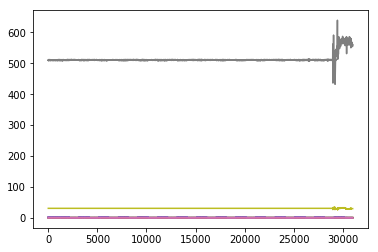

In [14]:
# Choose the file to verify
f_name_list = os.listdir(path_to_save)
f_name = f_name_list[0]
file_path_name = os.path.join(path_to_save, f_name)

print file_path_name
with h5.File(file_path_name, 'r') as f:
    
    root = f[f.keys()[0]]
    
    for dgNr in xrange(0, 4):
        plt.plot(root['digital/digital_{}'.format(dgNr + 1)])
        
    for dgNr in xrange(0, 5):
        
        plt.plot(root['raw/channel_{}'.format(dgNr + 1)])

ValueError: Not a location id (invalid object ID)